
===== K-Nearest Neighbors =====
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       923
           1       0.76      0.82      0.79       370

    accuracy                           0.87      1293
   macro avg       0.84      0.86      0.85      1293
weighted avg       0.88      0.87      0.88      1293

Recall: 0.8189
False Positive Rate: 0.1029


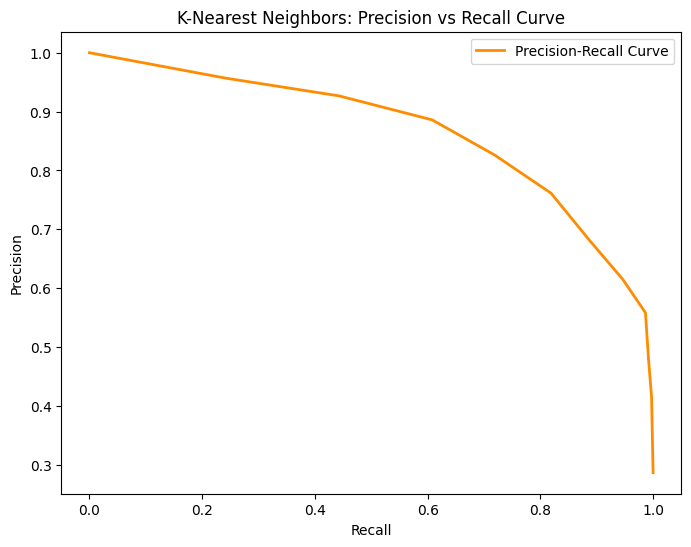

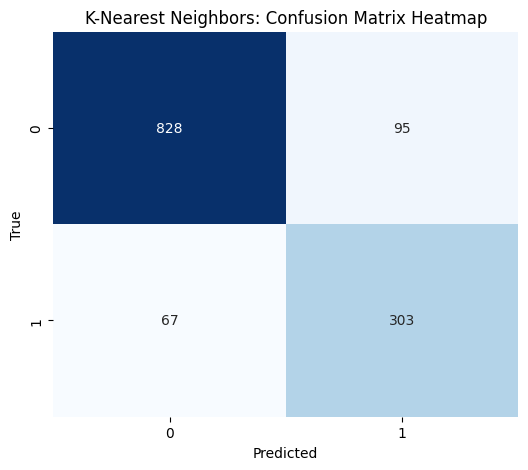

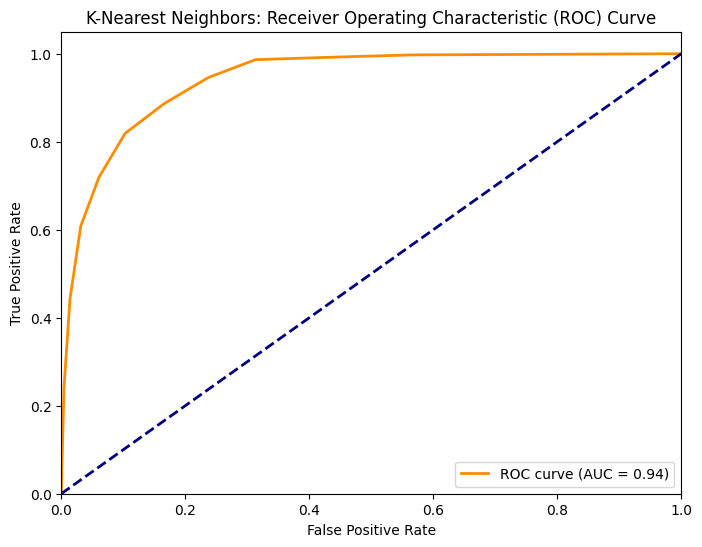


===== Support Vector Machine =====
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       923
           1       0.90      0.76      0.82       370

    accuracy                           0.91      1293
   macro avg       0.90      0.86      0.88      1293
weighted avg       0.91      0.91      0.90      1293

Recall: 0.7595
False Positive Rate: 0.0336


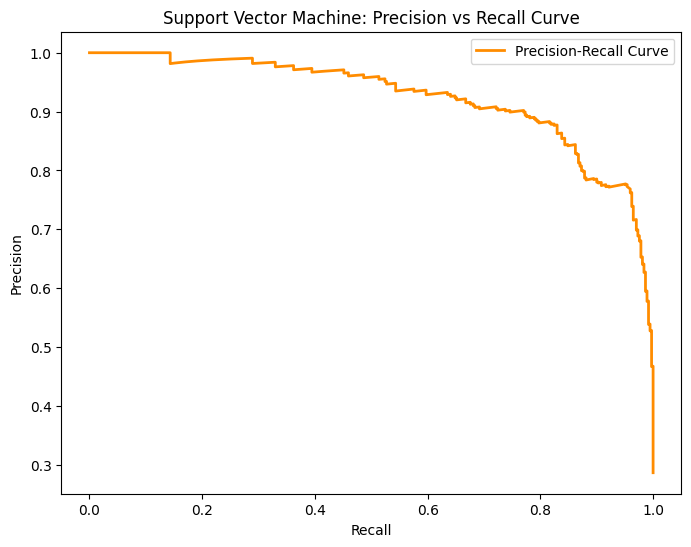

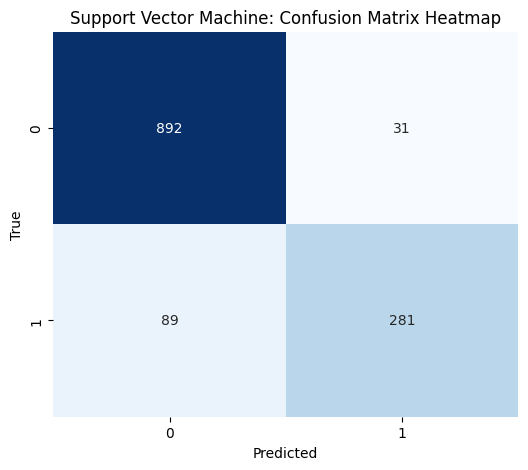

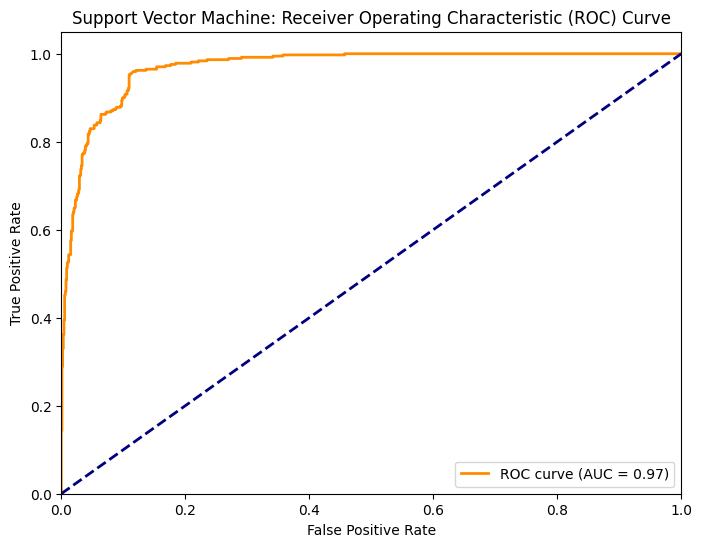

In [ ]:
# ```python
# -------------------------------
# Practical 2 : Email Spam Detection using KNN and SVM
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)

# -------------------------------
# Load and preprocess dataset
# -------------------------------
df = pd.read_csv("emails.csv")

# Drop missing values
df.dropna(how='any', inplace=True)

# Features and target
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=10
)

# -------------------------------
# Helper function: plots
# -------------------------------
def evaluate_model(model, x_train, x_test, y_train, y_test, model_name, use_proba=True):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Classification report
    print(f"\n===== {model_name} =====")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    recall_val = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
    fpr_val = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])
    print(f"Recall: {recall_val:.4f}")
    print(f"False Positive Rate: {fpr_val:.4f}")

    # Precision-Recall and ROC
    if use_proba:
        y_scores = model.predict_proba(x_test)[:, 1]
    else:
        y_scores = model.decision_function(x_test)

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="darkorange", lw=2, label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name}: Precision vs Recall Curve")
    plt.legend(loc="best")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name}: Confusion Matrix Heatmap")

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name}: Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="best")
    plt.show()


# -------------------------------
# KNN Classifier
# -------------------------------
kNN = KNeighborsClassifier(n_neighbors=10)
evaluate_model(kNN, x_train, x_test, y_train, y_test, "K-Nearest Neighbors", use_proba=True)

# -------------------------------
# SVM Classifier
# -------------------------------
svm = SVC(gamma="auto", random_state=10, probability=True)  # enable proba for ROC/PR
evaluate_model(svm, x_train, x_test, y_train, y_test, "Support Vector Machine", use_proba=False)
# ```
